# Stock Prices Prediction Using Keras Long Term Short Memory - SP500


In [30]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import quandl

%matplotlib inline
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [31]:
# Importing the training set
dataset_train = pd.read_csv('./data/GSPC.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [32]:
dataset_train.head()


         Date     Open     High     ...        Close  Adj Close      Volume
0  2000-01-03  1469.25  1478.00     ...      1455.22    1455.22   931800000
1  2000-01-04  1455.22  1455.22     ...      1399.42    1399.42  1009000000
2  2000-01-05  1399.42  1413.27     ...      1402.11    1402.11  1085500000
3  2000-01-06  1402.11  1411.90     ...      1403.45    1403.45  1092300000
4  2000-01-07  1403.45  1441.47     ...      1441.47    1441.47  1225200000

[5 rows x 7 columns]

In [33]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [34]:
# Creating a data structure with 60 timesteps and 1 output
# Used all Historical data, 1200 and 800 Rows
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [35]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [36]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [37]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [38]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [39]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [40]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [41]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



Epoch 1/100
1140/1140 [==============================] - 12s 10ms/step - loss: 0.0081
Epoch 2/100
1140/1140 [==============================] - 7s 6ms/step - loss: 0.0010
Epoch 3/100
1140/1140 [==============================] - 8s 7ms/step - loss: 9.0574e-04
Epoch 4/100
1140/1140 [==============================] - 7s 6ms/step - loss: 0.0010
Epoch 5/100
1140/1140 [==============================] - 8s 7ms/step - loss: 9.0480e-04
Epoch 6/100
1140/1140 [==============================] - 8s 7ms/step - loss: 7.8537e-04
Epoch 7/100
1140/1140 [==============================] - 10s 9ms/step - loss: 7.7280e-04
Epoch 8/100
1140/1140 [==============================] - 7s 6ms/step - loss: 6.8573e-04
Epoch 9/100
1140/1140 [==============================] - 10s 9ms/step - loss: 6.9864e-04
Epoch 10/100
1140/1140 [==============================] - 10s 9ms/step - loss: 7.2529e-04
Epoch 11/100
1140/1140 [==============================] - 7s 6ms/step - loss: 6.9194e-04
Epoch 12/100
1140/1140 [=============

1140/1140 [==============================] - 9s 8ms/step - loss: 2.0406e-04
Epoch 92/100
1140/1140 [==============================] - 10s 9ms/step - loss: 1.9210e-04
Epoch 93/100
1140/1140 [==============================] - 10s 8ms/step - loss: 2.0989e-04
Epoch 94/100
1140/1140 [==============================] - 7s 6ms/step - loss: 1.8799e-04
Epoch 95/100
1140/1140 [==============================] - 9s 8ms/step - loss: 2.0722e-04A: 3s - loss:
Epoch 96/100
1140/1140 [==============================] - 10s 8ms/step - loss: 2.1035e-04
Epoch 97/100
1140/1140 [==============================] - 10s 9ms/step - loss: 1.8794e-04
Epoch 98/100
1140/1140 [==============================] - 10s 9ms/step - loss: 1.9960e-04
Epoch 99/100
1140/1140 [==============================] - 10s 9ms/step - loss: 1.9139e-04
Epoch 100/100
1140/1140 [==============================] - 10s 9ms/step - loss: 1.8636e-04


In [42]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of Apr - Nov 2018
dataset_test = pd.read_csv('./data/GSPC18.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [43]:
# Getting the predicted stock price of 2018
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 220):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


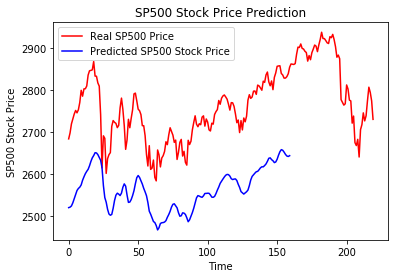

In [44]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real SP500 Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted SP500 Stock Price')
plt.title('SP500 Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SP500 Stock Price')
plt.legend()
plt.rcParams['figure.figsize'] = (12,9)
plt.show()